# Simulation study of RaschPy

## Description
This notenook is made for a simulation study of the RaschPy package. The objective is to simulate `B` datasets from the `RaschPy` package and fit `Rasch` models to the simulated data. We then wish to calculate coverage, mean and standard deviation of the simulated estimates.

In [1]:
# Loading relevant libraries

import pandas as pd             # For data manipulation
import numpy as np              # For numerical operations

import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For plotting

import sys, os                  # For adding the RaschPy library to the path

import random                   # For generating random numbers
import timeit                   # For timing the code

sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy"))
import RaschFunctions as rf # Loading Rasch functions library


sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy/RaschPy"))
import __init__ as Rasch # Loading the RaschPy library



We run the binary simulation study using the `Rasch_Run_B` function from `RaschFunctions.py`:

In [ ]:
# Number of items and persons
k_items = 10
n_persons = 500
n_simulations = 500

# Manual difficulties and person abilities
random.seed(80120205)
manual_diffs = [-1, 1, -0.5, 0.5, 0.1, -0.1, -2, 2, 2.5, -2.5]  # Must sum to 0
manual_abilities = np.random.normal(0, 1, n_persons)                    # Random normal distribution 

# Try the function
difficulties_est_df, difficulties_sd_df, difficulties_est_mean, difficulties_est_sd, difficulties_sd_mean, coverage = rf.run_SML_simulation_study(n_simulations = n_simulations, 
                                                                                                                                                  n_persons = n_persons, 
                                                                                                                                                  k_items = k_items, 
                                                                                                                                                  manual_diffs = manual_diffs, 
                                                                                                                                                  manual_abilities = manual_abilities)

KeyboardInterrupt: 

In [3]:
difficulties_est_mean

0   -1.001302
1    0.995982
2   -0.501958
3    0.506372
4    0.106304
5   -0.098804
6   -1.998676
7    1.997146
8    2.500488
9   -2.505576
dtype: float64

In [4]:
difficulties_est_sd

0    0.105470
1    0.107364
2    0.099701
3    0.100391
4    0.099308
5    0.102245
6    0.137070
7    0.134364
8    0.170406
9    0.168409
dtype: float64

In [5]:
difficulties_sd_mean

0    0.106902
1    0.107570
2    0.101120
3    0.100084
4    0.098702
5    0.098886
6    0.138626
7    0.139670
8    0.165098
9    0.164764
dtype: float64

In [6]:
coverage

array([0.952, 0.946, 0.954, 0.95 , 0.942, 0.94 , 0.954, 0.952, 0.938,
       0.942])

In [5]:
# Carry out simulation for different values of B in a for loop and store the results in a dictionary
random.seed(10022025)

# Number of items and persons
k_items = 10
n_persons_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_simulations = 100

manual_diffs = [-1, 1, -0.5, 0.5, 0.1, -0.1, -2, 2, 2.5, -2.5]  # Must sum to 0

results = {}

for n in n_persons_list:
    print(n)
    manual_abilities = np.random.normal(0, 1, n)
    difficulties_est_df, difficulties_sd_df, difficulties_est_mean, difficulties_est_sd, difficulties_sd_mean, coverage = rf.run_SML_simulation_study(n_simulations = n_simulations, 
                                                                                                                                                    n_persons = n, 
                                                                                                                                                    k_items = k_items, 
                                                                                                                                                    manual_diffs = manual_diffs, 
                                                                                                                                                    manual_abilities = manual_abilities)
    results[n] = [difficulties_est_mean, difficulties_est_sd, difficulties_sd_mean, coverage]


100
200
300
400
500
600
700
800
900
1000


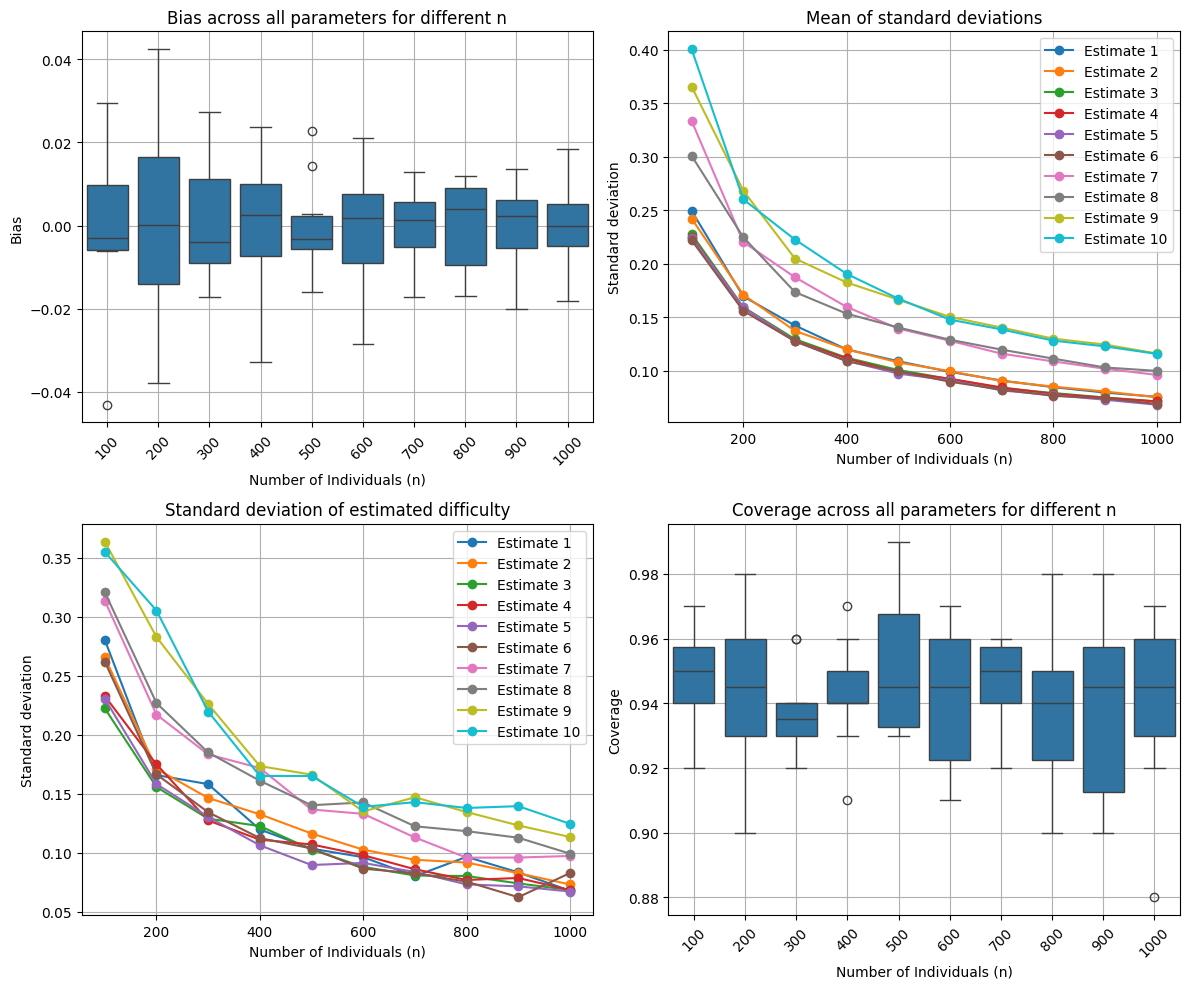

In [9]:
# Extract the number of individuals
num_individuals = sorted(results.keys())  # Ensure n values are in sorted order

# Extract data for each metric (list of lists)
difficulties_est_bias = [results[n][0] - manual_diffs for n in num_individuals]
difficulties_est_sds = [results[n][1] for n in num_individuals]
difficulties_sd_means = [results[n][2] for n in num_individuals]
coverages = [results[n][3] for n in num_individuals]

# Transpose the lists of lists to group data by the 10 values (e.g., beta1, beta2, ...)
difficulties_est_bias_by_value = list(zip(*difficulties_est_bias))  # Shape: 10 x len(num_individuals)
difficulties_est_sds_by_value = list(zip(*difficulties_est_sds))
difficulties_sd_means_by_value = list(zip(*difficulties_sd_means))
coverages_by_value = list(zip(*coverages))

# Convert data to long format for boxplots
bias_data = []
coverage_data = []

for n, biases, covs in zip(num_individuals, difficulties_est_bias, coverages):
    for bias in biases:
        bias_data.append({'n': n, 'Bias': bias})
    for coverage in covs:
        coverage_data.append({'n': n, 'Coverage': coverage})

bias_df = pd.DataFrame(bias_data)
coverage_df = pd.DataFrame(coverage_data)

# Convert 'n' to categorical for better visualization
bias_df['n'] = bias_df['n'].astype(str)
coverage_df['n'] = coverage_df['n'].astype(str)

# Create the plots
plt.figure(figsize=(12, 10))

# Bias boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x='n', y='Bias', data=bias_df)
plt.title('Bias across all parameters for different n')
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Bias')
plt.xticks(rotation=45)
plt.grid()


# Plot difficulties_est_sd
plt.subplot(2, 2, 3)
for i, estimates in enumerate(difficulties_est_sds_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Standard deviation')
plt.title('Standard deviation of estimated difficulty')
plt.grid()
plt.legend()

# Plot difficulties_sd_mean
plt.subplot(2, 2, 2)
for i, estimates in enumerate(difficulties_sd_means_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Standard deviation')
plt.title('Mean of standard deviations')
plt.grid()
plt.legend()


# Coverage boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x='n', y='Coverage', data=coverage_df)
plt.title('Coverage across all parameters for different n')
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Coverage')
plt.xticks(rotation=45)
plt.grid()

# Show plots
plt.tight_layout()
plt.savefig("C:/Users/brf337/Desktop/Rasch package/Rasch-models-in-Python-and-R/Python code/Plots/SimulationPlotPython.png")
plt.show()


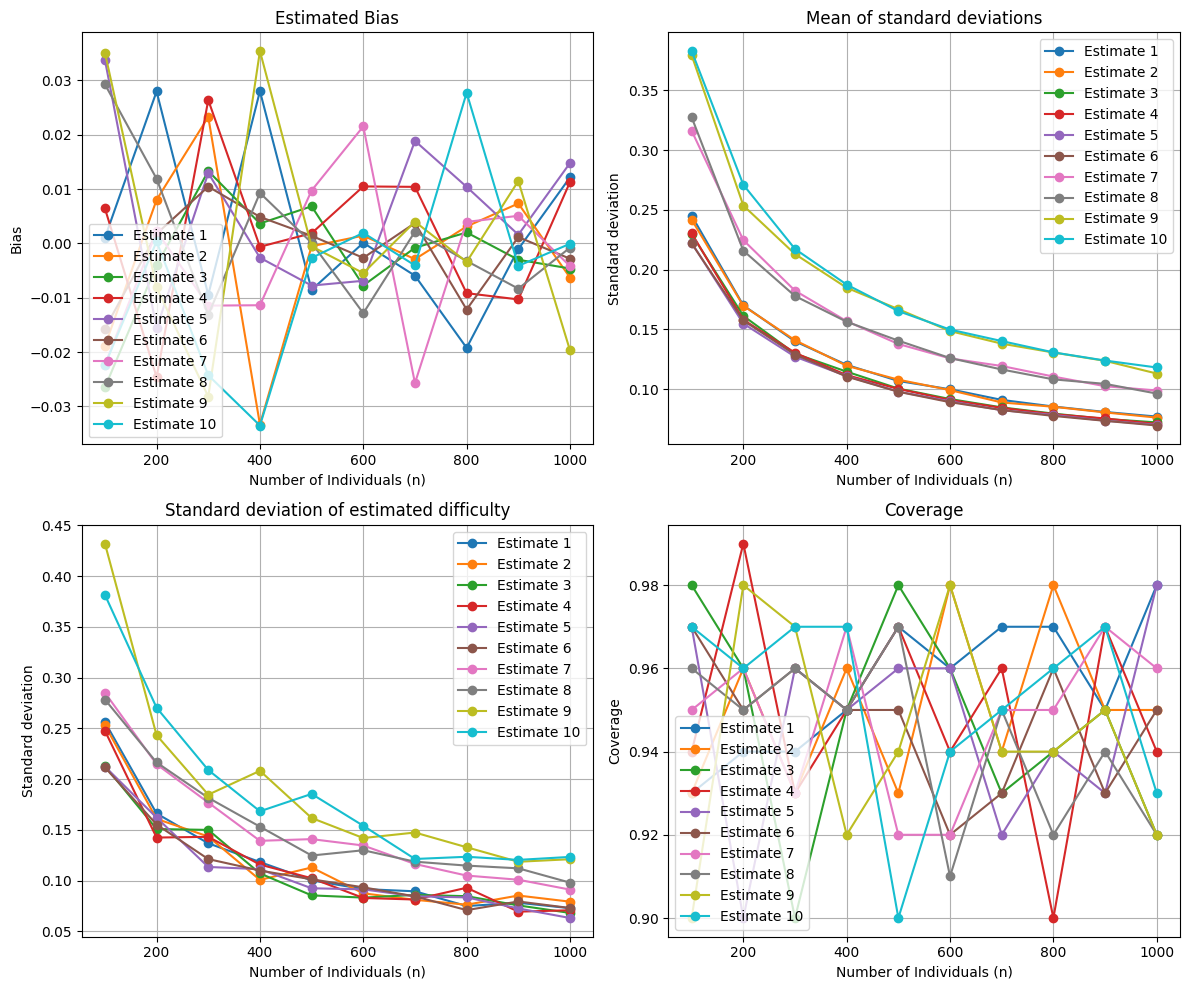

In [10]:
# Extract the number of individuals
num_individuals = sorted(results.keys())  # Ensure n values are in sorted order

# Extract data for each metric (list of lists)
difficulties_est_bias = [results[n][0] - manual_diffs for n in num_individuals]
difficulties_est_sds = [results[n][1] for n in num_individuals]
difficulties_sd_means = [results[n][2] for n in num_individuals]
coverages = [results[n][3] for n in num_individuals]

# Transpose the lists of lists to group data by the 10 values (e.g., beta1, beta2, ...)
difficulties_est_bias_by_value = list(zip(*difficulties_est_bias))  # Shape: 10 x len(num_individuals)
difficulties_est_sds_by_value = list(zip(*difficulties_est_sds))
difficulties_sd_means_by_value = list(zip(*difficulties_sd_means))
coverages_by_value = list(zip(*coverages))

# Create the plots
plt.figure(figsize=(12, 10))

# Plot difficulties_est_mean
plt.subplot(2, 2, 1)
for i, estimates in enumerate(difficulties_est_bias_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Bias')
plt.title('Estimated Bias')
plt.grid()
plt.legend(loc = 'lower left')

# Plot difficulties_est_sd
plt.subplot(2, 2, 3)
for i, estimates in enumerate(difficulties_est_sds_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Standard deviation')
plt.title('Standard deviation of estimated difficulty')
plt.grid()
plt.legend()

# Plot difficulties_sd_mean
plt.subplot(2, 2, 2)
for i, estimates in enumerate(difficulties_sd_means_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Standard deviation')
plt.title('Mean of standard deviations')
plt.grid()
plt.legend()

# Plot coverage
plt.subplot(2, 2, 4)
for i, estimates in enumerate(coverages_by_value):
    plt.plot(num_individuals, estimates, marker='o', label=f"Estimate {i+1}")
plt.xlabel('Number of Individuals (n)')
plt.ylabel('Coverage')
plt.title('Coverage')
plt.grid()
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Test of PCM simulation

We try out the PCM simulation function here

In [3]:
manual_diffs = [-1, 1, -0.5, 0.5, 0.1, -0.1, -2, 2, 2.5, -2.5]  # Must sum to 0
manual_abilities = np.random.normal(0, 1, 500)                  # Random normal distribution
#item_response_to_add = [["Item_1", "Item_2"], ["Item_3", "Item_4"], ["Item_5", "Item_6"], ["Item_7", "Item_8"], ["Item_9", "Item_10"]]

rf.simulate_PCM(n = 500, k = 10, PCM_options = 2, manual_diffs = manual_diffs, manual_abilities = manual_abilities, item_response_to_add = None)

c:\Users\brf337\Desktop\Rasch package\Python code\RaschFunctions.py:117: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  PCM_df = SML_df.groupby([[i//PCM_options for i in range(0, len(SML_df.columns))]], axis = 1).sum()


,Item_1,Item_2,Item_3,Item_4,Item_5
Person_1,2.0,2.0,2.0,1.0,2.0
Person_2,0.0,0.0,0.0,0.0,1.0
Person_3,0.0,0.0,2.0,1.0,1.0
Person_4,0.0,0.0,1.0,1.0,1.0
Person_5,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...
Person_496,1.0,1.0,1.0,1.0,2.0
Person_497,2.0,1.0,0.0,1.0,2.0
Person_498,2.0,1.0,2.0,1.0,2.0
Person_499,1.0,1.0,0.0,1.0,1.0


In [5]:
test_list = [["Item_1", "Item_2"], ["Item_3", "Item_4"], ["Item_5", "Item_6"], ["Item_7", "Item_8"], ["Item_9", "Item_10"]]
test_list[0]

['Item_1', 'Item_2']